# Installing Necessary Packages

In [3]:
device = "/device:CPU:0"

In [4]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<b>With Intel® Extension for Scikit-learn*, you can accelerate up to 10- 100x, 3 while conforming to scikit-learn APIs. <br>Ref: https://intel.github.io/scikit-learn-intelex/index.html

In [6]:
!pip install onednn-cpu-gomp

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
os.environ['DNNL_ENGINE_LIMIT_CPU_CAPABILITIES'] = '0'
os.environ['ONEDNN_VERBOSE'] = '0' #'0' As i dont want to see the logs, set to '1' to see model epoch verbose logs

os.environ['ONEAPI_DEVICE_SELECTOR'] = 'opencl:*'
os.environ['SYCL_ENABLE_DEFAULT_CONTEXTS'] = '1'
os.environ['SYCL_ENABLE_FUSION_CACHING'] = '1'

<b>Enabling oneDNN Optimizations for TensorFlow* running on Intel hardware.<br>
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Purpose-,TF_ENABLE_ONEDNN_OPTS,-True

<b>Setting the ONEAPI_DEVICE_SELECTOR using oneAPI DPC++ Framework to use only the OpenCL devices available. Setting SYCL_ENABLE_DEFAULT_CONTEXTS = 1 which will enable creation of default platform contexts in SYCL runtime.
Setting SYCL_ENABLE_FUSION_CACHING = 1 which will enable caching of JIT compilations for kernel fusion. <br>
All the above environment variables are set for optimal performance and memory utilization.<br>
Ref: https://intel.github.io/llvm-docs/EnvironmentVariables.html#oneapi-device-selector:~:text=Controlling%20DPC%2B%2B%20runtime

In [8]:
!pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install mkl

Defaulting to user installation because normal site-packages is not writeable


In [10]:
!pip install --upgrade intel-extension-for-tensorflow[cpu]

Defaulting to user installation because normal site-packages is not writeable


<b>Intel® Extension for TensorFlow* aims to bring Intel CPU or GPU devices into TensorFlow open source community for AI workload acceleration. <br>Ref: https://github.com/intel/intel-extension-for-tensorflow#install-for-cpu:~:text=installation%20for%20details.-,Install%20for%20CPU,-pip%20install%20%2D%2Dupgrade

In [11]:
!python -c "import intel_extension_for_tensorflow as itex; print(itex.__version__)"

2023-08-11 08:02:37.203169: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 08:02:37.205219: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 08:02:37.241256: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 08:02:37.241695: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 08:02:39.242943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

<b>The above message "Intel Extension for Tensorflow* AVX512 CPU backend is loaded." means we are using Intel Tensorflow Operator Optimization (CPU).<br>Ref:
https://intel.github.io/intel-extension-for-tensorflow/latest/docs/guide/features.html

In [12]:
import intel_extension_for_tensorflow as itex

2023-08-11 08:02:45.567845: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 08:02:45.569862: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 08:02:45.608732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 08:02:45.609595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 08:02:46.416023: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [13]:
os.environ['ITEX_XPU_BACKEND'] = 'CPU'

<b>Setting the Specific Backend Type as CPU to use the Intel Tensorflow Operator Optimization.
https://www.intel.com/content/www/us/en/developer/articles/technical/optimization-for-tensorflow-and-itex-cheat-sheet.html

In [14]:
os.environ['ITEX_AUTO_MIXED_PRECISION'] = '1'

<b>Enabling Advanced Automatic Mixed Precision: A Basic Configuration for Improved Inference Speed with Reduced Memory Consumption. <br> Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/optimization-for-tensorflow-and-itex-cheat-sheet.html#:~:text=export%20ITEX_AUTO_MIXED_PRECISION%3D1%C2%A0%0Aexport%20ITEX_AUTO_MIXED_PRECISION_DATA_TYPE%3D%22BFLOAT16%22%20%23%20or%20%22FLOAT16%22

## Data Preprocessing and Model Creation

In [15]:
import cv2
import os
import time
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.models import load_model

In [16]:
image_directory='datasets/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

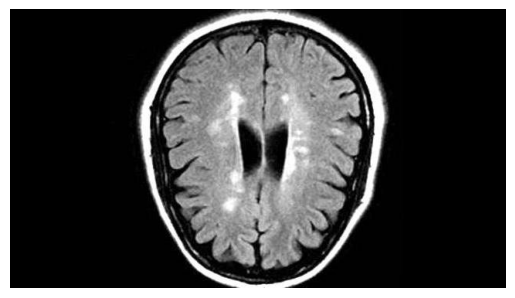

In [17]:
plt.figure()
img = cv2.imread(image_directory + 'no/' + no_tumor_images[0])
plt.imshow(img)
plt.axis('off')
plt.show() 

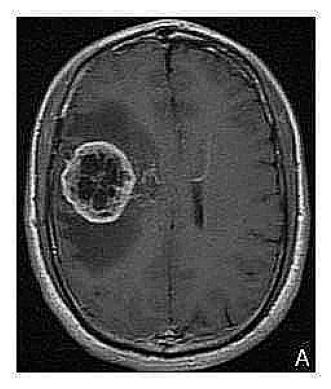

In [18]:
plt.figure()
img = cv2.imread(image_directory + 'yes/' + yes_tumor_images[0])
plt.imshow(img)
plt.axis('off')
plt.show() 

In [19]:
dataset=[]
label=[]

INPUT_SIZE=64

In [20]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [21]:
dataset=np.array(dataset)
label=np.array(label)

In [22]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '0'

<b>Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are going to train our model now, we set it to False. <br>Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

In [21]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

2023-08-11 01:39:57,208 - root - INFO - sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-08-11 01:39:57,228 - root - INFO - sklearn.model_selection.train_test_split: running accelerated version on CPU


<b>Optimizing train_test_split using scikit-learn-intelex.<br>
Ref:https://intel.github.io/scikit-learn-intelex/algorithms.html

In [22]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

In [23]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [28]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)
end_time = time.time()

Epoch 1/10


2023-08-11 01:44:31.758223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:31.762118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:31.766607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:32.265304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:32.325214: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 01:44:32.416627: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 79/408 nodes to bfloat16 precision using 2 cast(s) to bfloat16 (excluding Const and Variable casts)


  5/150 [>.............................] - ETA: 2s - loss: 0.0588 - accuracy: 0.9750  

2023-08-11 01:44:32.475910: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 01:44:32.494914: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 0/454 nodes to bfloat16 precision using 0 cast(s) to bfloat16 (excluding Const and Variable casts)


149/150 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9924

2023-08-11 01:44:34.632589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:34.637715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:34.644956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:34.724622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:34.742500: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-11 01:44:34.754415: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 11/76 nodes to bfloat16 precision using 1 cast(s) to bfloat16 (excluding Const and Variable casts)
2023-08-11 01:44:34

150/150 [==============================] - 3s 16ms/step - loss: 0.0208 - accuracy: 0.9925 - val_loss: 0.1301 - val_accuracy: 0.9700
Epoch 2/10
150/150 [==============================] - 2s 14ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.1649 - val_accuracy: 0.9550
Epoch 3/10


2023-08-11 01:44:36.921905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:36.927401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:36.934670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 15ms/step - loss: 0.0316 - accuracy: 0.9883 - val_loss: 0.2004 - val_accuracy: 0.9517
Epoch 4/10
  1/150 [..............................] - ETA: 2s - loss: 0.0295 - accuracy: 1.0000

2023-08-11 01:44:39.107821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:39.112973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:39.120840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 15ms/step - loss: 0.0199 - accuracy: 0.9929 - val_loss: 0.1415 - val_accuracy: 0.9667
Epoch 5/10


2023-08-11 01:44:41.287165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:41.292738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:41.300060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 14ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.1334 - val_accuracy: 0.9600
Epoch 6/10


2023-08-11 01:44:43.457090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:43.462930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:43.470491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 15ms/step - loss: 0.0220 - accuracy: 0.9946 - val_loss: 0.1376 - val_accuracy: 0.9783
Epoch 7/10


2023-08-11 01:44:45.749621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:45.755275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:45.762632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


149/150 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987

2023-08-11 01:44:48.009718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:48.015228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:48.022541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 15ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.1557 - val_accuracy: 0.9700
Epoch 8/10
150/150 [==============================] - 2s 15ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1601 - val_accuracy: 0.9733
Epoch 9/10


2023-08-11 01:44:50.281731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:50.287206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:50.294665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 15ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9750
Epoch 10/10


2023-08-11 01:44:52.543568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:52.548731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:52.556415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


147/150 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996

2023-08-11 01:44:54.826248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:54.831514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-11 01:44:54.838800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.


150/150 [==============================] - 2s 16ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1581 - val_accuracy: 0.9683


In [29]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 23.59744930267334 seconds


<b> As you can see, with Intel Optimizations, the time taken for training is only 23.59 seconds and the accuracy is the same.

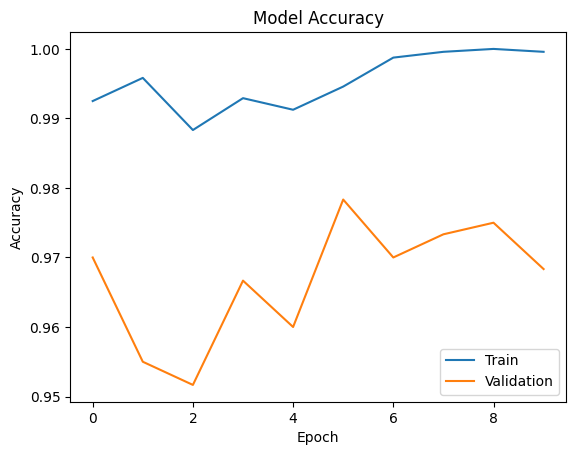

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [25]:
model.save('BrainTumor10EpochsCategorical.h5')

/home/u197984/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model=load_model('BrainTumor10EpochsCategorical.h5')

In [27]:
os.environ['TF_ONEDNN_USE_SYSTEM_ALLOCATOR'] = '1'

<b>Use system allocator or BFC allocator in MklCPUAllocator. In general, we set this flag to True for inference, and set this flag to False for training. So, since we are goin to test our model now we set it to true.<br>
Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html

In [28]:
import os

os.environ['TF_ONEDNN_ASSUME_FROZEN_WEIGHTS'] = '1'

<b>Frozen weights for inference.
Better inference performance is achieved with frozen graphs.<br> Ref: https://www.intel.com/content/www/us/en/developer/articles/technical/maximize-tensorflow-performance-on-cpu-considerations-and-recommendations-for-inference.html#:~:text=Frozen%20weights%20for%20inference.%0ABetter%20inference%20performance%20is%20achieved%20with%20frozen%20graphs.

In [29]:
image=cv2.imread('datasets/yes/y1.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

In [30]:
result=model.predict(input_img)
class_index = np.argmax(result)
if class_index==0:
    print("No Brain Tumor")
elif class_index==1:
    print("Yes Brain Tumor")

1/1 [==============================] - 0s 149ms/step
Yes Brain Tumor


2023-08-10 21:23:07.610132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:07.614070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:07.619684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:07.711303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:07.718513: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:118] Run advanced auto mixed precision datatype BFLOAT16 on CPU
2023-08-10 21:23:07.728659: I itex/core/graph/auto_mixed_precision/auto_mixed_precision.cc:1742] Converted 12/39 nodes to bfloat16 precision using 0 cast(s) to bfloat16 (excluding Const and Variable casts)
2023-08-10 21:23:07

In [31]:
image=cv2.imread('datasets/no/no0.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

In [32]:
result=model.predict(input_img)
class_index = np.argmax(result)
if class_index==0:
    print("No Brain Tumor")
elif class_index==1:
    print("Yes Brain Tumor")

1/1 [==============================] - 0s 18ms/step
No Brain Tumor


2023-08-10 21:23:09.201718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:09.205575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
2023-08-10 21:23:09.211182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type CPU is enabled.
